In [153]:
#Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

# 1.Data Description


In [154]:
# Read the given CSV file, and view some sample records

bike_df = pd.read_csv('day.csv')
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [155]:
#shape of dataset
bike_df.shape

(730, 16)

In [156]:
# describe the dataset
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [157]:
# dataset datatype
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [158]:
# check null values
bike_df.isnull()
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [159]:
# Rename  columns

bike_df.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'Target_variable'}, inplace = True) 
bike_df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Target_variable
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Data mapping

Seasons
1 - Spring 2 - Summer 3 - Fall 4 - Winter

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [160]:
bike_df['season']=bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })


In [161]:
bike_df['weathersit']=bike_df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_df['weathersit'].head()

0    Mist + Cloudy
1    Mist + Cloudy
2            Clear
3            Clear
4            Clear
Name: weathersit, dtype: object

In [162]:
bike_df['month']=bike_df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [163]:
bike_df['weekday']=bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [164]:
bike_df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Target_variable
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 3. Data Visual

In [165]:
# find out categorical and continous variable
bike_df.nunique().sort_values()

Year                 2
holiday              2
workingday           2
weathersit           3
season               4
weekday              7
month               12
temp               498
humidity           594
casual             605
windspeed          649
registered         678
atemp              689
Target_variable    695
instant            730
dteday             730
dtype: int64

<AxesSubplot:xlabel='season', ylabel='Target_variable'>

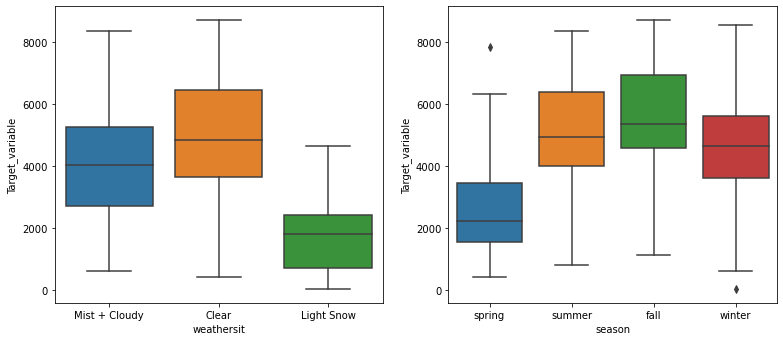

In [166]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'Target_variable', data = bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'Target_variable', data = bike_df)


<AxesSubplot:xlabel='workingday', ylabel='Target_variable'>

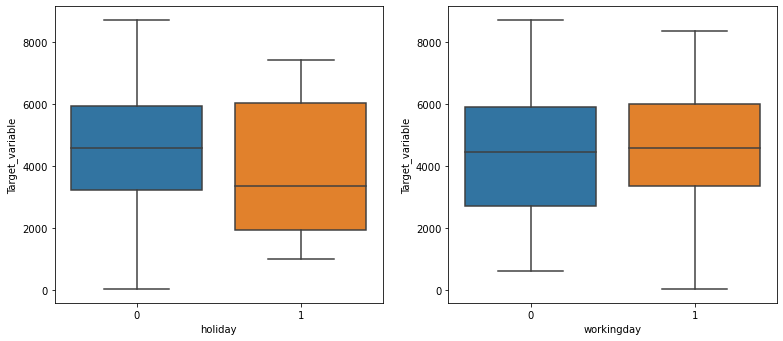

In [167]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'Target_variable', data = bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'Target_variable', data = bike_df)


<AxesSubplot:xlabel='weekday', ylabel='Target_variable'>

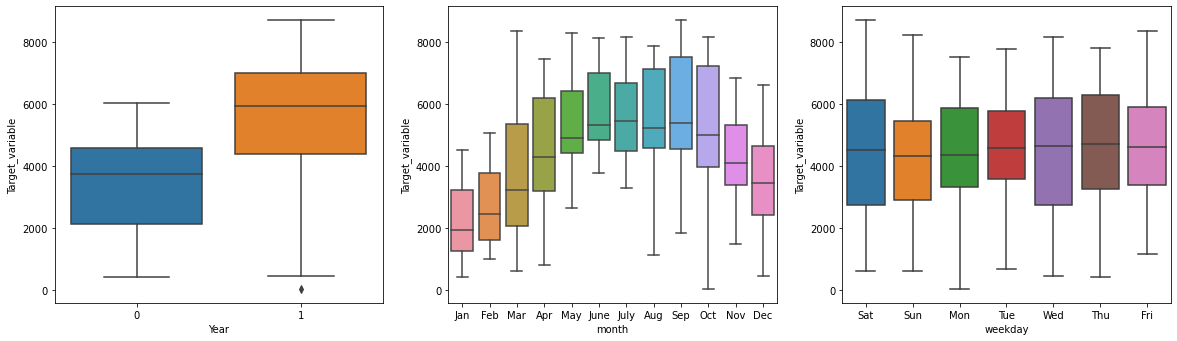

In [168]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Year', y = 'Target_variable', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'Target_variable', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'Target_variable', data = bike_df)



# Observation from the visuals:
1. Bike sharing is high in clear weather condition,ie..(Clear, Few clouds, Partly cloudy, Partly cloudy)
2. Bike Rentals are more in 2019 compared to 2018
3. more on Saturday,wednesday and thursday
4. sharing is more in fall season and summer
5. The Bike sharing are less during holidays

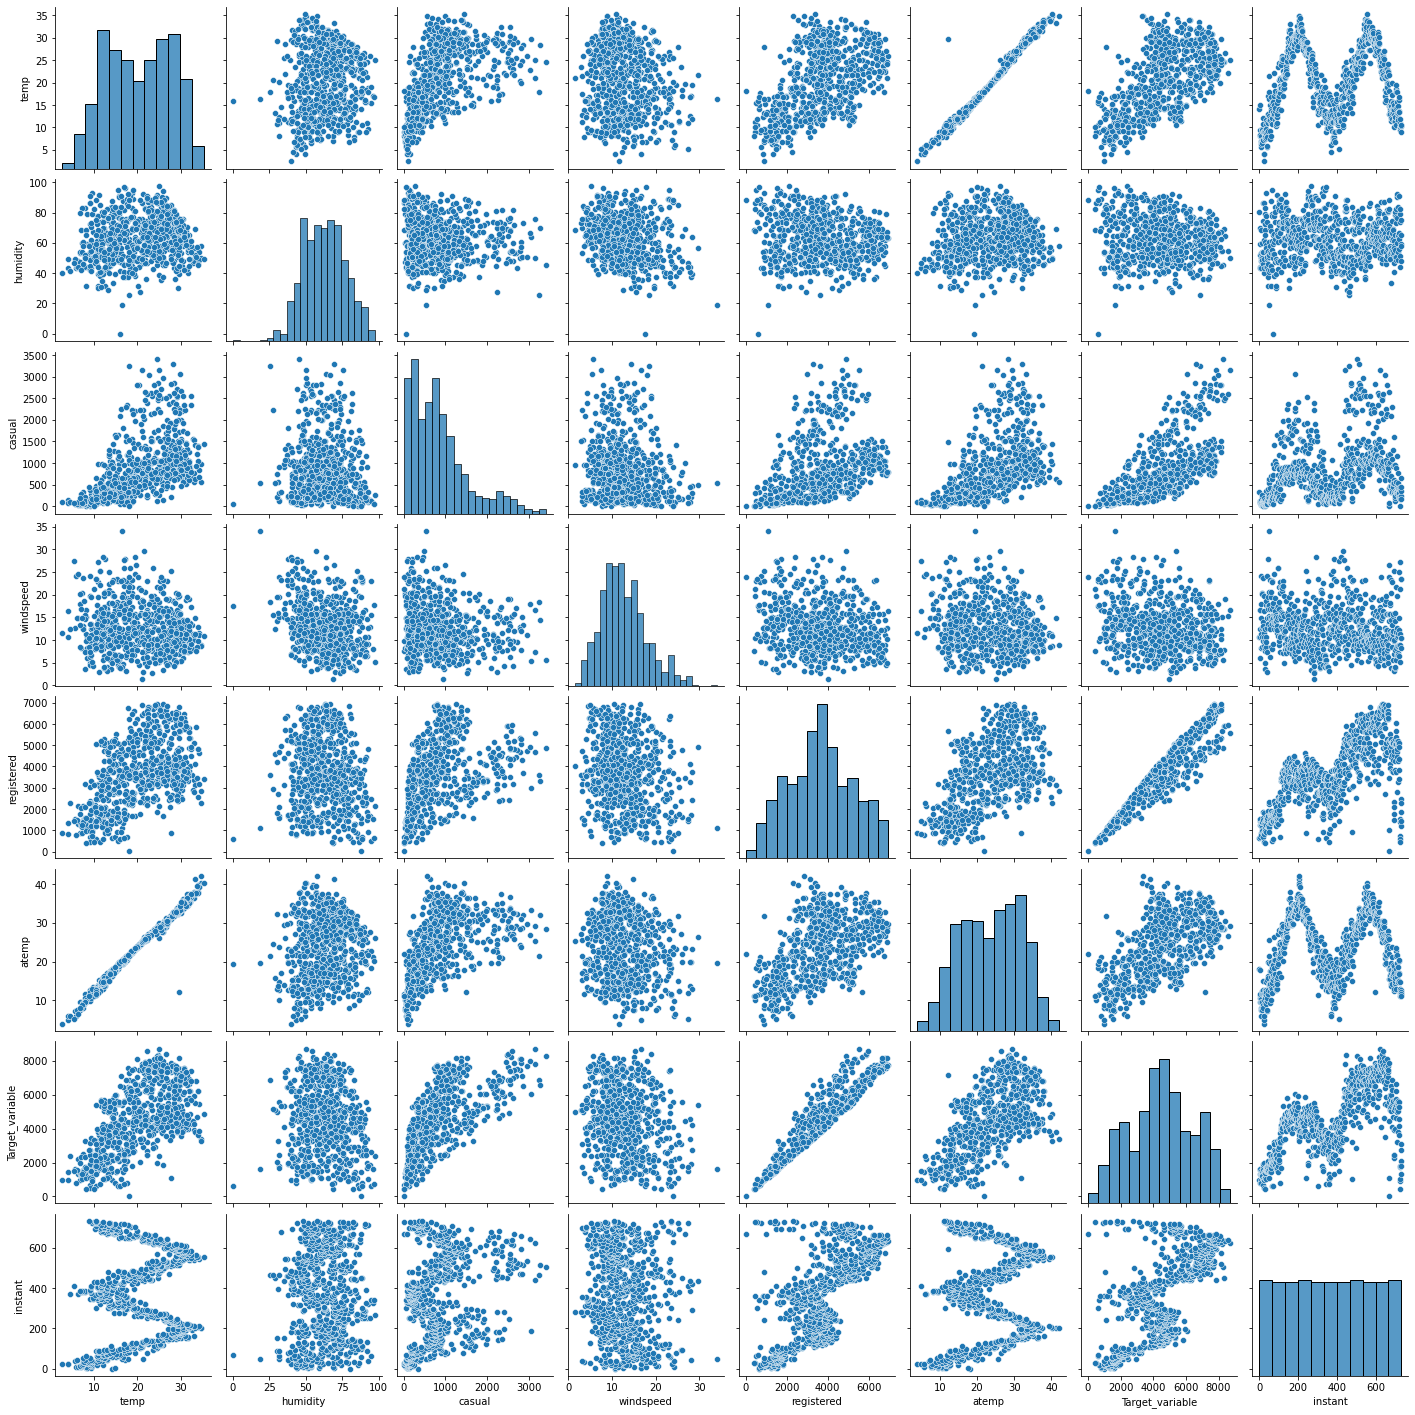

In [169]:
# continous variable plot

sns.pairplot(bike_df, vars=["temp", "humidity",'casual','windspeed','registered','atemp','Target_variable','instant'])
plt.show()

In [170]:
#drop unnecessary columns

bike_df=bike_df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike_df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Target_variable
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# 4. Data Prepare

In [171]:
#Dummy variables for month, season, weathersit, weekday

months=pd.get_dummies(bike_df.month,drop_first=True)
weekdays=pd.get_dummies(bike_df.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_df.season,drop_first=True)


In [172]:
bike_df=pd.concat([months,weekdays,weather_sit,seasons,bike_df],axis=1)
bike_df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Target_variable
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [174]:
# Drop 'season','month','weekday','weathersit' 

bike_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Target_variable
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# 5. Splitting Data into Training and Testing Sets


In [175]:
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [176]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [177]:
# Min-Max scaling
scaler = MinMaxScaler()
num_vars=['temp','humidity','windspeed','Target_variable']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Target_variable
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


#### Dividing into X and Y sets for the model building

In [178]:
#Divide the data into X and y
y_train = bike_train.pop('Target_variable')
X_train = bike_train

# 6. Building a linear model

#### LinearRegression function from SciKit Learn

In [181]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [182]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [183]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [184]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [185]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [186]:
# Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)


In [187]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [188]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        22:22:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

In [189]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [196]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,humidity,1.91
5,Mist + Cloudy,1.57


In [201]:

X_train_rfe




,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,1,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,1,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,1,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,1,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,1,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,1,0,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,1,0,1,0,0,0,1,0.462664,0.759870,0.529881


In [200]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        22:26:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

In [202]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [203]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,humidity,1.91
5,Mist + Cloudy,1.57


In [204]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)


In [205]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.28e-188
Time:                        22:27:44   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1355      0.024      5.691

In [206]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [207]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,35.88
2,Sat,8.96
3,Sun,8.41
6,spring,4.96
12,temp,3.39
8,winter,3.35
7,summer,2.60
10,holiday,2.34
0,July,1.48
1,Sep,1.29


In [208]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [209]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.28e-188
Time:                        22:28:35   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [210]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [211]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.74
12,windspeed,4.76
2,Sat,4.45
3,Sun,4.21
6,spring,3.82
8,winter,2.78
7,summer,2.76
9,Year,2.07
0,July,1.60


In [212]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [214]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          3.30e-182
Time:                        22:30:44   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     497   BIC:                            -899.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0484      0.039      1.249

In [215]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [216]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,15.73
11,temp,12.54
2,Sat,4.31
3,Sun,4.11
6,spring,3.48
8,winter,2.71
7,summer,2.60
9,Year,2.07
0,July,1.60
5,Mist + Cloudy,1.59


In [217]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [218]:
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_variable   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          6.52e-182
Time:                        22:32:50   Log-Likelihood:                 486.70
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     498   BIC:                            -898.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0412      0.039      1.061

In [219]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [220]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,15.64
10,temp,11.72
1,Sat,4.28
2,Sun,4.07
5,spring,3.33
7,winter,2.49
6,summer,2.22
8,Year,2.07
4,Mist + Cloudy,1.58
0,Sep,1.23


# 7.Residual Analysis of the train data

In [222]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
576,1.0,0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,1,0,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,1,0,0,1,0,0,1,0,0.245101
482,1.0,0,1,0,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,1,0.202618
350,1.0,0,1,0,0,1,0,0,1,0,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,1,0.462664


In [223]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

# 8. Analysis on making prediction

In [225]:
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','Target_variable']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Target_variable
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [227]:
#Dividing into X_test and y_test
y_test = bike_test.pop('Target_variable')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [228]:
X_train_new5.columns

Index(['Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'workingday', 'temp'],
      dtype='object')

In [229]:
# our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
184,1.0,0,0,0,0,1,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,1,0.817246


In [230]:
# Making predictions
y_pred = lm5.predict(X_test_new1)


In [231]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8116726791329995

In [232]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


#  9: Evaluation of Model

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

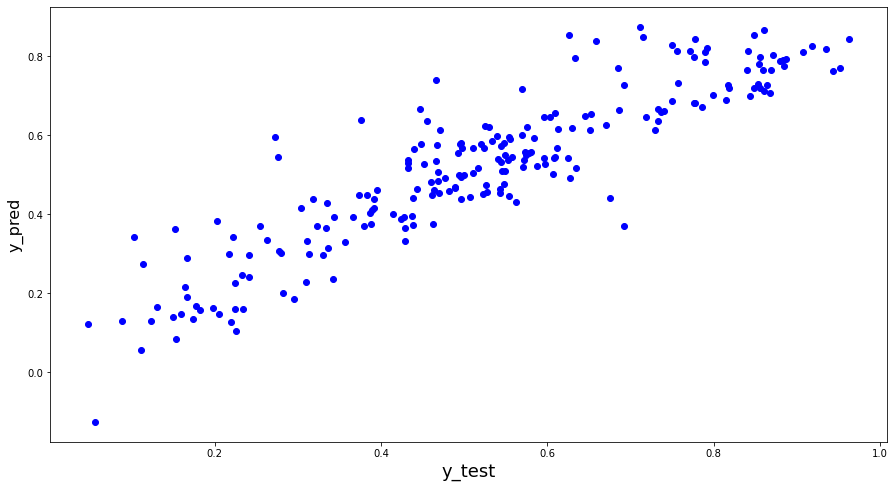

In [233]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)     

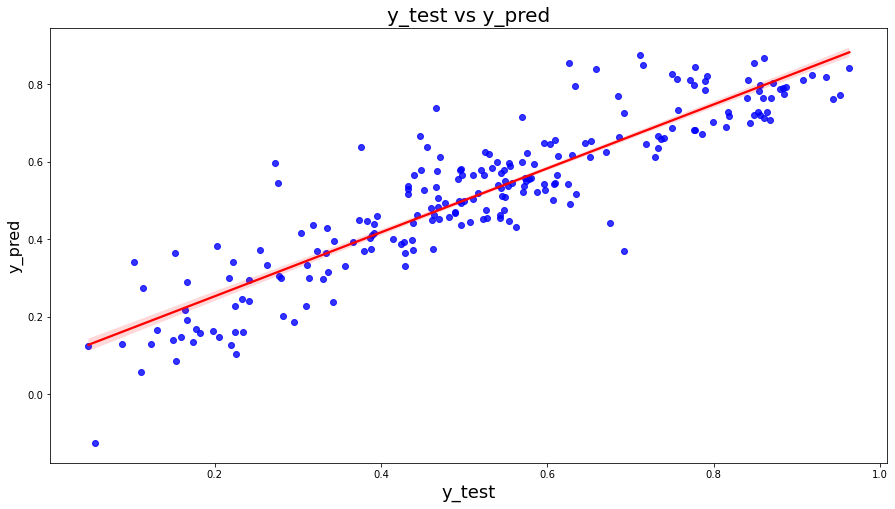

In [235]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

 We can see that the equation of our best fitted line is:
Target_variable=0.4914* temp+0.0916* September + 0.0645 * Saturday +0.0527 * summer + 0.0970 *s winter + 0.2334 * Year + 0.0566 * working day- 0.03041 * light snow - 0.0786 * mist cloudy -0.065 *times spring

The possible variables : temp,year,season-winter,month_Sep,season-Summer indicate that an increase in these values will lead to an increase in the value of Target_variable
The negative variables : month-Jul,season_Spring,weathersit_Mist & Cloudy,holiday,windspeed,weathersit_Light Snow & Rain indicate that an increase in these values will lead to an deccrease in the value of Target_variable

### Final Observation 

1. Temperature has the highest impact
2. The rental is very low in holidays
3. demand for bikes was more in 2019 than 2018